sympy是一个数字符号运算库，能解决积分、微分方程等问题

sympy.dsolve解微分方程 符号解决

以y的二阶导+2倍的y的一阶导+y=x的平方

In [72]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
y = sp.symbols('y', cls=sp.Function)
x = sp.symbols('x')
eq = sp.Eq(y(x).diff(x,2)+2*y(x).diff(x,1)+y(x),x*x)
print(sp.dsolve(eq))
solution = sp.solve(eq,y) #展示的为符号解，要用lambdify转换成数字解

Eq(y(x), x**2 - 4*x + (C1 + C2*x)*exp(-x) + 6)


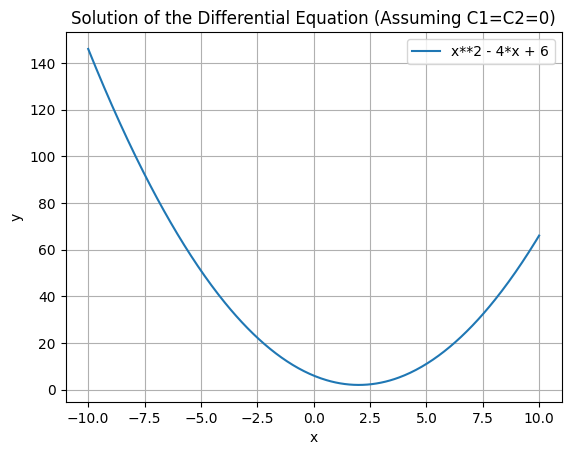

In [73]:


# 提取通解并假设常数值为0
C1, C2 = sp.symbols('C1 C2') #将C1和符号C1关联起来
sol_expr = solutions.rhs.subs({C1: 0, C2: 0}) #solution.rhs: 获取解的右侧部分（即 y(x) 的表达式）
# subs: 替换表达式中的符号
f_sol = sp.lambdify(x, sol_expr, 'numpy')
#lambdify将符号表达式转换为可以进行数值计算

# 生成x值
x_vals = np.linspace(-10, 10, 400)

# 计算y值
y_vals = f_sol(x_vals)

# 绘制图像
plt.plot(x_vals, y_vals, label=str(sol_expr))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the Differential Equation (Assuming C1=C2=0)')
plt.legend()
plt.grid(True)
plt.show()


求导

In [74]:
C1 = sp.symbols('C1')
C2 = sp.symbols('C2')
f = (C1*sp.sin(5*x)+C2*sp.cos(5*x))*sp.exp(-2*x)
print(f.diff(x))#求一阶导

-2*(C1*sin(5*x) + C2*cos(5*x))*exp(-2*x) + (5*C1*cos(5*x) - 5*C2*sin(5*x))*exp(-2*x)


求微分方程数值解  scipy.intergrate 的 odeint

虽然很多时候解不出符号解，但是自变量去不同值的时候是可以形成一个一一对应的列表的

还可以将符合解和数值解对比，画图看看

本质内部是欧拉法和龙格库塔法

解一阶微分方程的数值解

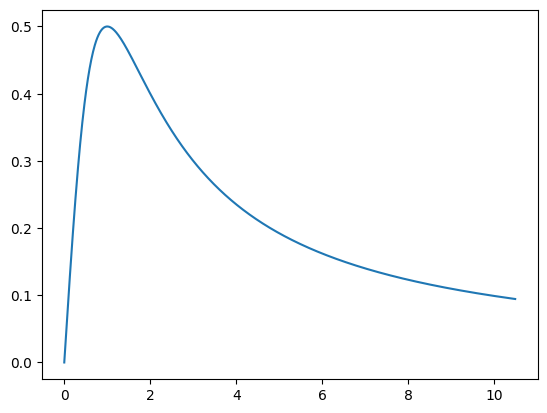

[0.000e+00 1.000e-02 2.000e-02 ... 1.047e+01 1.048e+01 1.049e+01] [[0.         0.00999899 0.019992   ... 0.09464757 0.09455889 0.09447037]]


In [75]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
dy = lambda y,x: 1/(1+x**2)-2*y**2
x = np.arange(0,10.5,0.01)
sol = odeint(dy,0, x)
plt.plot(x,sol)
plt.show()
print(x,sol.T)

解高阶微分方程的数值解

[[ 0.00000000e+00  2.00000000e+00]
 [ 1.73172315e+00  2.64833852e+00]
 [ 1.73303834e+00 -8.65032906e-04]
 [ 1.73302969e+00 -8.65047366e-04]
 [ 1.73302104e+00 -8.65055973e-04]
 [ 1.73301239e+00 -8.65064594e-04]
 [ 1.73300374e+00 -8.65073223e-04]
 [ 1.73299508e+00 -8.65081855e-04]
 [ 1.73298643e+00 -8.65090487e-04]
 [ 1.73297778e+00 -8.65099120e-04]
 [ 1.73296913e+00 -8.65107752e-04]
 [ 1.73296048e+00 -8.65116385e-04]
 [ 1.73295182e+00 -8.65125017e-04]
 [ 1.73294317e+00 -8.65133650e-04]
 [ 1.73293452e+00 -8.65142282e-04]
 [ 1.73292587e+00 -8.65150914e-04]
 [ 1.73291721e+00 -8.65159547e-04]
 [ 1.73290856e+00 -8.65168179e-04]
 [ 1.73289991e+00 -8.65176812e-04]
 [ 1.73289126e+00 -8.65185444e-04]
 [ 1.73288261e+00 -8.65194077e-04]
 [ 1.73287395e+00 -8.65202709e-04]
 [ 1.73286530e+00 -8.65211341e-04]
 [ 1.73285664e+00 -8.65220014e-04]
 [ 1.73284798e+00 -8.65228646e-04]]


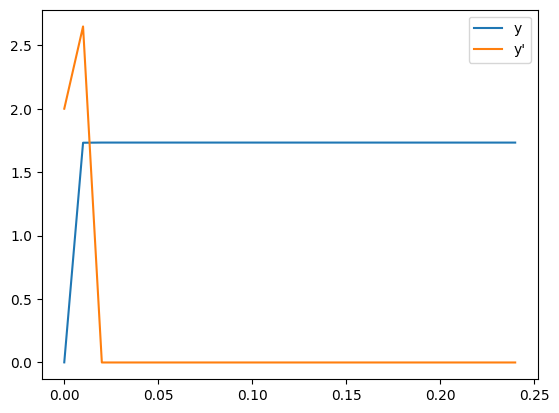

In [79]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
def fvdp(t,y):
    '''把y看成是一个向量，y = 【dy0，dy1，dy2，dy3.。。。】分别表示y的n阶导那么
    y【0】就是需要求解的导数，y【1】表示一阶导，以此类推'''
    dy1 = y[1]
    dy2 = 1000*(1-y[0]**2)*y[1]-y[0] #把二阶导之外的移到右边
    return [dy1,dy2]
def solve_second_order_ode():
    x = np.arange(0,0.25,0.01)
    y0 = [0.0,2.0] #初值 y(0)=0 ,y'(0)=2
    sol = odeint(fvdp,y0,x,tfirst=True) #sol就是y的集合
    y1 = plt.plot(x,sol[:,0],label="y")
    y2 = plt.plot(x,sol[:,1],label="y'")
    plt.legend()
    return sol
sol = solve_second_order_ode()
print(sol)

求解微分方程组

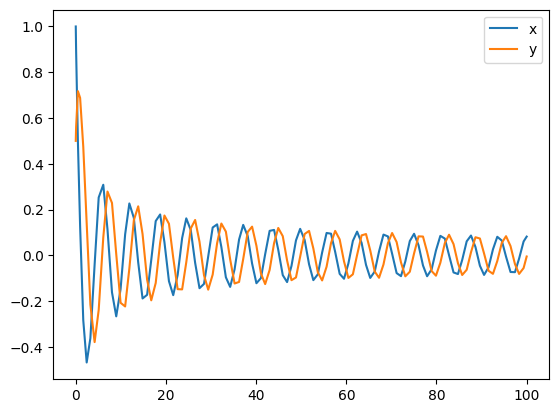

In [87]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp#解微分方程组 ，odeint也可以
import numpy as np
def fun(t,w): #返回的列表包含微分方程组的右端项，t是时间区间，本题为（0，100）
    x = w[0]
    y = w[1]
    return [-x**3-y,-y**3+x]
y0 = [1,0.5]
yy = solve_ivp(fun,(0,100),y0,tfirst=True)#参数 tfirst=True 表示 y0 是第一个参数，而不是第二个,因为有个（0，100）
t = yy.t
'''t 是时间点的数组；
data 是与时间点 t 对应的解的数组，每一行代表一个未知函数的解'''
data =yy.y
plt.plot(t,data[0,:],label="x")
plt.plot(t,data[1,:],label="y")
plt.legend()
plt.show()

差分方程,离散化的数组的微分方程，可以把连续的问题离散化求解

微分方程组案例1：
covid—19传播模型特征：
1.传播速度快、规模大、连续变化
2.总和为1
3.每个颜色码有进有出，总体平衡


 SI模型，传染病模型,典型的Logistic增长模型,z型增长
 

Text(0.5, 1.0, 'COVID-19感染人数比例图')

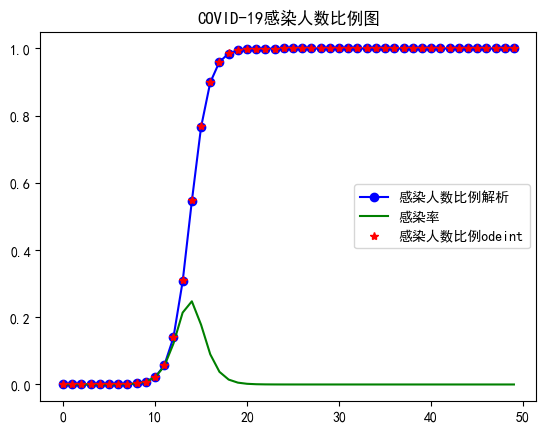

In [90]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
def fuc(y,t,lamda,mu):
    dy_dt = lamda*y*(1-y) #  N * di/dt = lamda * N * i * (1-i) 感染率等于每天感染者接触人为的易感染人群的概率 lamda为接触的平均人数
    return dy_dt
number = 1e7
lamda = 1.0
mu = 0.5 #日治愈率，每天被治愈的人数占感染者总人数的百分比
y0 = i0 =1e-6 #患者比例的初始值
tEND = 50 #观察的时间，为x轴
t = np.arange(0.0,tEND,1)
yanalyze = 1/(1+(1/i0-1)*np.exp(-lamda*t))#解析解，即使用高数的方法计算     连线
yintege = odeint(fuc,y0,t,args=(lamda,mu)) #求解初值问题,计算每日的感染人数比例  断点
yderiv = lamda * yintege * (1-yintege) #求解每日感染人数
plt.plot(t,yanalyze,'-ob',label="感染人数比例解析")
plt.plot(t,yderiv,'g',label="感染率")
plt.plot(t,yintege,'*r',label="感染人数比例odeint")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.legend()
plt.title('COVID-19感染人数比例图')


SIR模型，加入康复

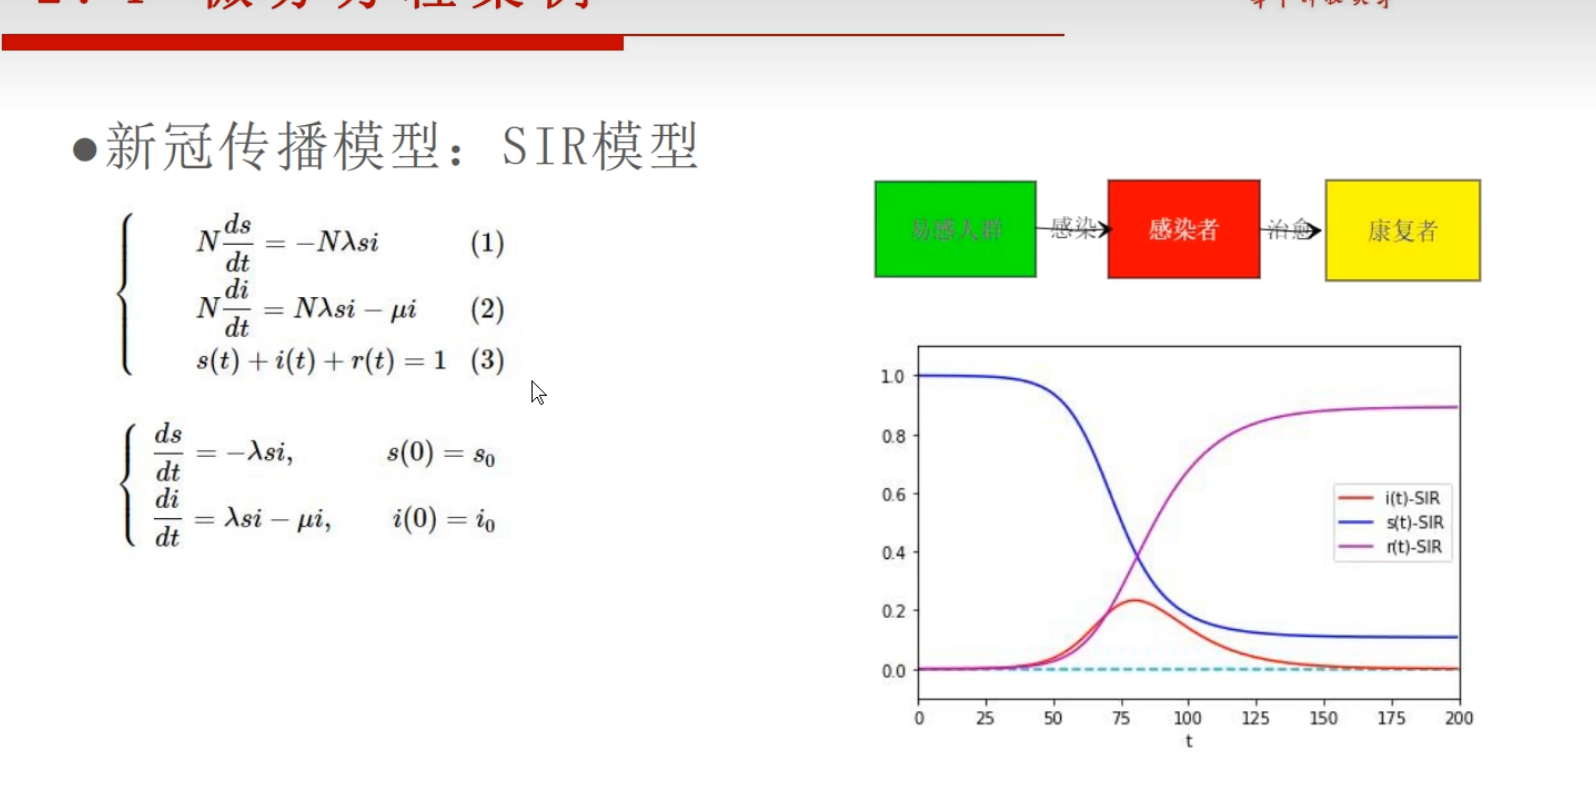

In [91]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-30 144255.png")

lamda=0.2	mu=0.05	sigma=2.5	(1-1)/sigma=0.6


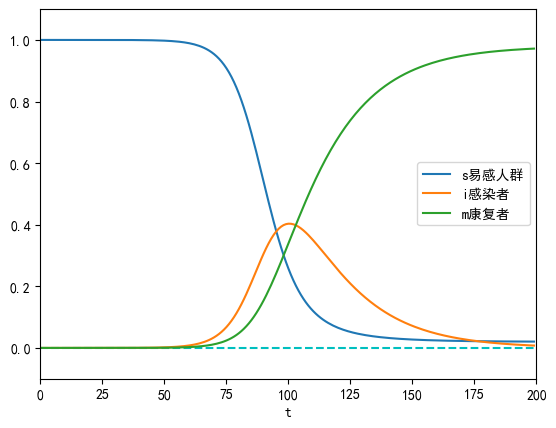

In [100]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
def sir(y,t,lamda,mu):
    i , s =y
    di_dt = lamda*s*i - mu*i#感染比例，收入减支出
    ds_dt = - lamda*s*i #易感人群的比例变化率
    return di_dt, ds_dt
number = 1e7
lamda = 0.2
sigma = 2.5 #传染期接触数目，总的接触
mu = lamda/sigma
fsig = 1-1 /sigma
tEnd1 = 200
t = np.arange(0,tEnd1,1)
i0 = 1e-6
s0 =1-i0
Y0 = [i0,s0]
print("lamda={}\tmu={}\tsigma={}\t(1-1)/sigma={}".format(lamda,mu,sigma,fsig))
ysir = odeint(sir,Y0,t,args=(lamda,mu))
plt.xlabel('t')
plt.axis([0,tEnd1,-0.1,1.1]) # 设定画幅
plt.axhline(y=0,ls ='--',color='c')
plt.plot(t,ysir[:,1],label="s易感人群")
plt.plot(t,ysir[:,0],label="i感染者")
plt.plot(t,1-ysir[:,0]-ysir[:,1],label='m康复者')
plt.legend(loc = 'best')
plt.show()

SEIR模型，加上疑似病例，且康复者不会再次感染，总数下降，最符合现实

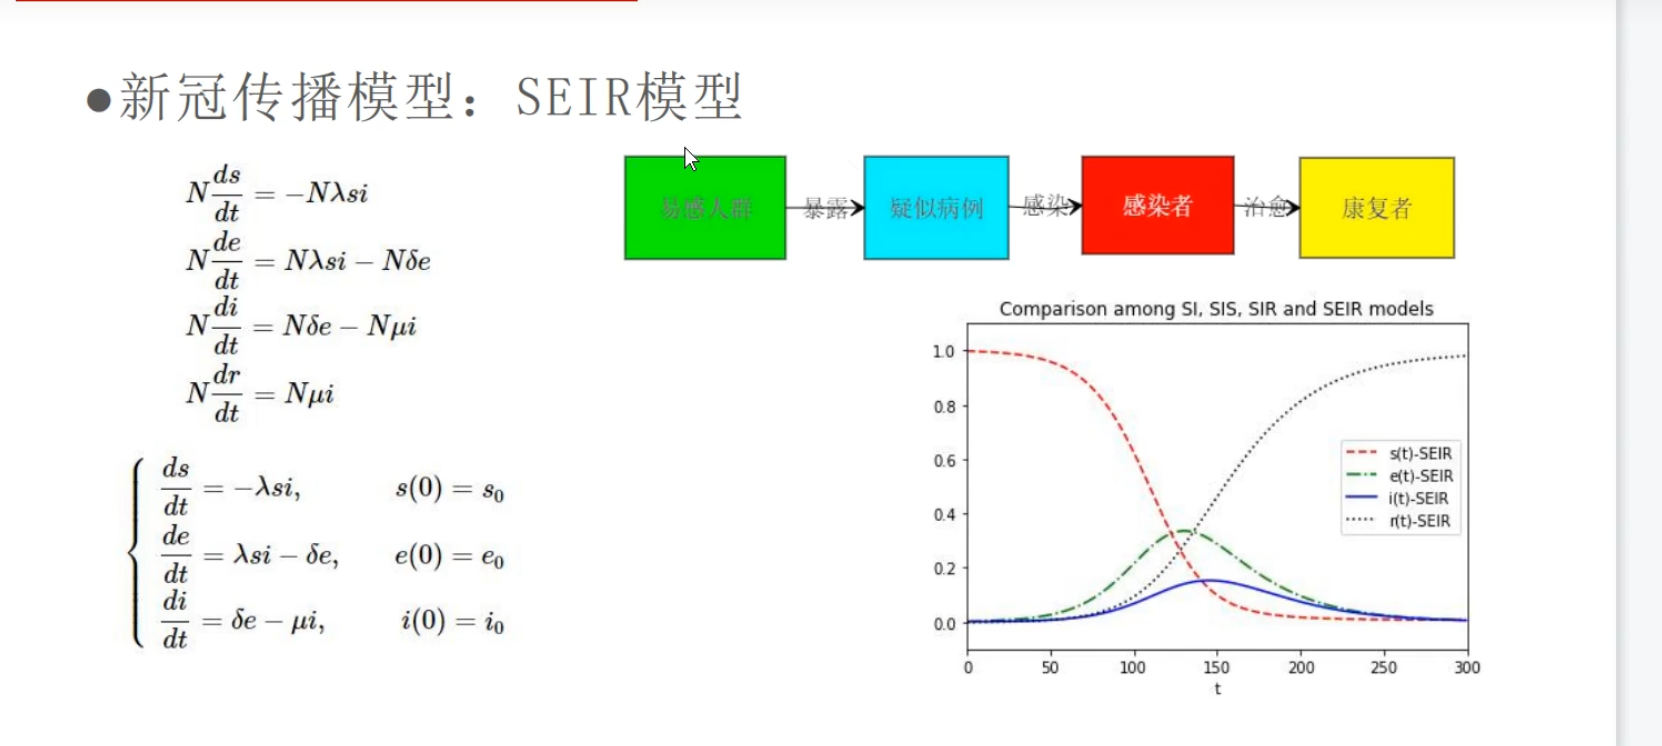

In [98]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-30 154652.png")

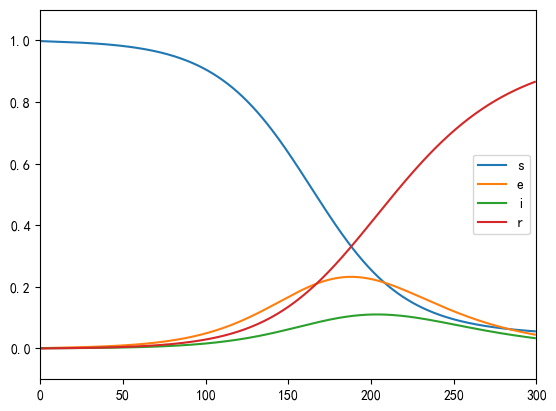

In [131]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
def seir(y,t,lamda,delta,mu):
    s,e,i = y
    ds_dt = - lamda*s*i
    de_dt = lamda*s*i-delta*e
    di_dt = delta*e-mu*i
    
    return ds_dt, de_dt, di_dt
number1 = 1e5
lamda1 = 0.2
delta = 0.03
mu1 = 0.06
sigma1 = lamda1/mu1 #传染期接触数目，总的接触

fsig = 1-1 /sigma
tEnd1 = 300
t = np.arange(0,tEnd1,1)
i01 = 1e-3
e01 = 1e-3
s01 =1-i01-e01
Y0 = [s01,e01,i01]
plt.axis([0,tEnd1,-0.1,1.1]) # 设定画幅
yseir = odeint(seir,Y0,t,args=(lamda1,delta,mu1))
plt.plot(t,yseir[:,0],label='s')
plt.plot(t,yseir[:,1],label='e')
plt.plot(t,yseir[:,2],label='i')  #bug,x和y的位置一开始写反了
plt.plot(t,1-yseir[:,0]-yseir[:,1]-yseir[:,2],label='r')
plt.legend(loc = 'best')

死亡人数，获得性免疫，康复人的流向可进一步思考

捕食者模型，黄石国家公园的狼和鹿的关系图

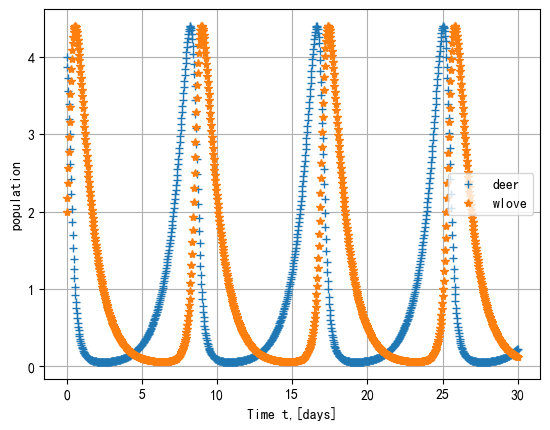

In [126]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
a = 1
b =1
d =1
g =1
x0 =4
y0 =2
def derivative(X,t,a,b,d,g):
    x,y = X
    dotx = x*(a-b*y)
    doty = y*(-d+g*x)
    return np.array([dotx,doty])
NT = 1000
tmax = 30
t = np.linspace(0,tmax,NT)
X0 = [x0,y0]
res = odeint(derivative,X0,t,args=(a,b,d,g))
x,y = res.T
plt.figure()
plt.grid()
plt.plot(t,x,'+',label='deer')
plt.plot(t,y,'*',label='wlove')
plt.legend(loc = 'best')
plt.xlabel('Time t,[days]')
plt.ylabel('population')
plt.show()

找出平衡点，就是变化率小的点，导数为零 